In [3]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle
import scipy.sparse as sp

from matplotlib.pyplot import figure

from pygenstability import run, plotting
from pygenstability.optimal_scales import *
from pygenstability.pygenstability import evaluate_NVI

In [4]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration.MS_MCF import MS_MCF

In [5]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [6]:
plt.rcParams.update({'font.size': 20})

# Generate multiscale SBM

In [7]:
from scipy.linalg import block_diag

[Text(0.5, 1.0, 'Coarse scale, n=3')]

<Figure size 432x288 with 0 Axes>

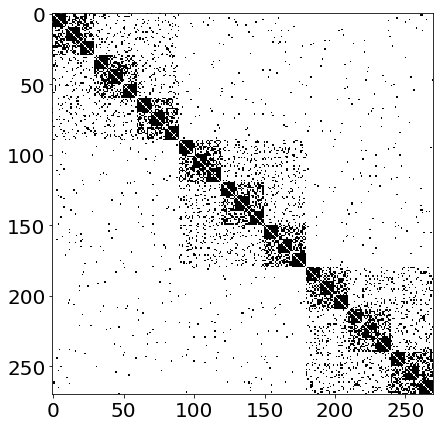

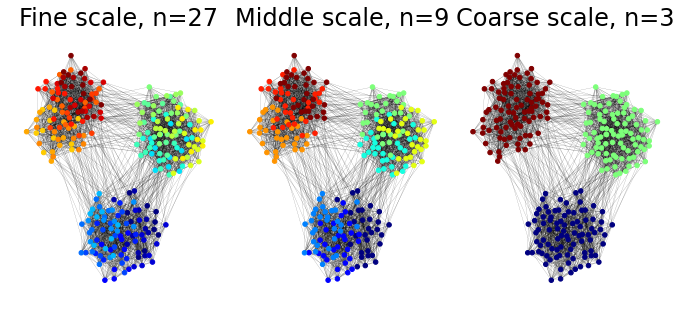

In [8]:
def block(n, th, rng):
    A = rng.uniform(0, 1, (n, n))
    A[A < th] = 0.0
    A[A > th] = 1.0
    A = (A + A.T) / 2
    return A


# define size and strength of multiscale structure
n0 = 270
th0 = 0.995

n1 = 3
th1 = 0.95

n2 = 9
th2 = 0.8

n3 = 27
th3 = 0.2

# construct adjacency matrix
rng = np.random.RandomState(42)
A = block(n0, th0, rng)
A += block_diag(*[block(int(n0 / n1), th1, rng) for i in range(n1)])
A += block_diag(*[block(int(n0 / n2), th2, rng) for i in range(n2)])
A += block_diag(*[block(int(n0 / n3), th3, rng) for i in range(n3)])

# binarized
A[A > 0] = 1

# remove self-loops
A -= np.diag(np.diag(A))

# plot matrix
plt.figure()
figure(figsize=(8, 7))
plt.imshow(A, interpolation="nearest",cmap='binary')
#plt.savefig(root_fig +'SBM_adjacency_matrix.pdf', bbox_inches='tight')

# Multiscale structure
coarse_scale_id = np.zeros(n0)
middle_scale_id = np.zeros(n0)
fine_scale_id = np.zeros(n0)

for i in range(n1):
    coarse_scale_id[(i * n0 // n1) : ((i + 1) * n0 // n1)] = i

for i in range(n2):
    middle_scale_id[(i * n0 // n2) : ((i + 1) * n0 // n2)] = i

for i in range(n3):
    fine_scale_id[(i * n0 // n3) : ((i + 1) * n0 // n3)] = i

# Create nx graph
G = nx.from_numpy_array(A)

# Compute spring layout
pos = nx.layout.spring_layout(G, seed=2)

# Plot multiscale graph structure
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
fig.subplots_adjust(hspace=0.4, wspace=0)


nx.draw(
    G,
    ax=axes[0],
    pos=pos,
    node_size=20,
    arrows=False,
    width=0.1,
    node_color=fine_scale_id,
    cmap="jet",
)
axes[0].set(title=r"Fine scale, n=27")

nx.draw(
    G,
    ax=axes[1],
    pos=pos,
    node_size=20,
    arrows=False,
    width=0.1,
    node_color=middle_scale_id,
    cmap="jet",
)
axes[1].set(title=r"Middle scale, n=9")

nx.draw(
    G,
    ax=axes[2],
    pos=pos,
    node_size=20,
    arrows=False,
    width=0.1,
    node_color=coarse_scale_id,
    cmap="jet",
)
axes[2].set(title=r"Coarse scale, n=3")

#plt.savefig(root_fig +'Multiscale_Structure.pdf', dpi=fig.dpi,bbox_inches='tight')

In [9]:
print(G)

Graph with 270 nodes and 3473 edges


# Markov Stability filtration - full OOP framework


In [10]:
# Set MS parameters
n_scale = 100
min_scale = -1.5
max_scale = 0.5

In [11]:
# initialise MSF object
msf = MS_MCF()

In [12]:
# # run MS analysis, build filtration and compute PH
# all_results = run(sp.csgraph.csgraph_from_dense(A),min_scale=min_scale,max_scale=max_scale,n_scale=n_scale,with_ttprime=True,with_optimal_scales=True)#,exp_comp_mode="expm")

filtration took 3:14

In [13]:
# all_results

In [14]:
# run MS analysis, build filtration and compute PH
msf.fit_transform(sp.csgraph.csgraph_from_dense(A),min_scale,max_scale,n_scale,with_ttprime=True,with_optimal_scales=True)

Running Markov Stability analysis ... 


100%|██████████| 100/100 [00:11<00:00,  8.88it/s]


Constructing filtration with GUDHI ...


100%|██████████| 100/100 [00:00<00:00, 209.40it/s]

Computing persistence with GUDHI ... 


# Results from Markov Stability analysis

In [15]:
all_results = msf.ms_results

In [16]:
all_results

{'run_params': {'constructor': 'continuous_normalized',
  'min_scale': -1.5,
  'max_scale': 0.5,
  'n_scale': 100,
  'log_scale': True,
  'scales': None,
  'n_tries': 100,
  'with_NVI': True,
  'n_NVI': 20,
  'with_postprocessing': True,
  'with_ttprime': True,
  'with_spectral_gap': False,
  'exp_comp_mode': 'expm',
  'result_file': 'results.pkl',
  'n_workers': 4,
  'tqdm_disable': False,
  'with_optimal_scales': True,
  'optimal_scales_kwargs': None,
  'method': 'louvain'},
 'scales': [0.03162277660168379,
  0.03312851891487236,
  0.03470595828181067,
  0.036358508611685776,
  0.03808974636954072,
  0.03990341831649379,
  0.04180344961851454,
  0.04379395234130495,
  0.045879234349670873,
  0.04806380863064391,
  0.050352403060530404,
  0.052749970637026196,
  0.0552617001985409,
  0.05789302765393119,
  0.06064964774694602,
  0.06353752638084484,
  0.06656291352986198,
  0.0697323567654597,
  0.07305271542664456,
  0.07653117546501338,
  0.0801752649966579,
  0.08399287059458467,
 

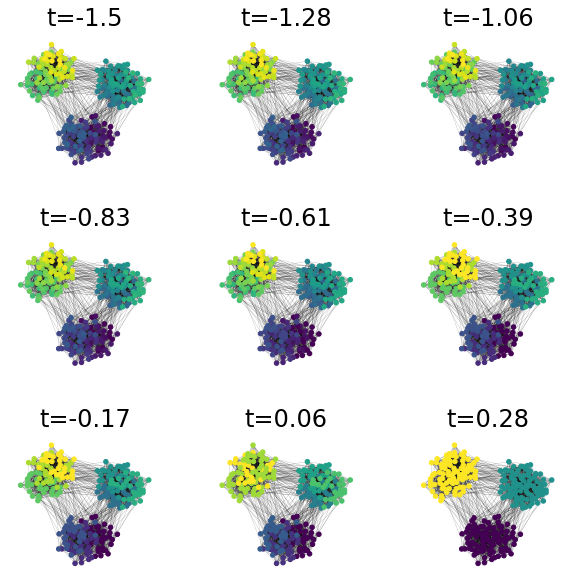

In [17]:
# Get scales
scales = all_results['scales']
log_scales = np.log10(all_results['scales'])
n_scale = all_results["run_params"]["n_scale"]

# Get information about communities
community_id = all_results['community_id']
n_communities  = all_results['number_of_communities']

fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    scale = int(i*len(scales)/9)
    
    nx.draw(G, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[scale])
    ax.set(title=r't={}'.format(np.around(log_scales[scale],2)))
plt.show()

In [36]:
partitions_matrix = np.zeros((G.number_of_nodes(),n_scale))

for i in range(0,100):
    partitions_matrix[:,i] = community_id[i]

partitions_matrix = np.asarray(partitions_matrix, dtype="int")

In [37]:
partitions_matrix

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [  2,   2,   2, ...,   0,   0,   0],
       ...,
       [267, 267, 267, ...,   2,   2,   2],
       [268, 268, 268, ...,   2,   2,   2],
       [269, 269, 269, ...,   2,   2,   2]])

In [39]:
np.savetxt("SBM_MS.csv", partitions_matrix.astype(int), fmt='%i', delimiter=',')

[-0.75252525 -0.26767677  0.35858586]


[<AxesSubplot:xlabel='$log_{10}(t)$', ylabel='$log_{10}(t^\\prime)$'>,
 <AxesSubplot:xlabel='$log_{10}(t)$', ylabel='NVI'>,
 <AxesSubplot:ylabel='Stability'>,
 <AxesSubplot:ylabel='# clusters'>,
 <AxesSubplot:xlabel='$log_{10}(t)$', ylabel='Block NVI'>]

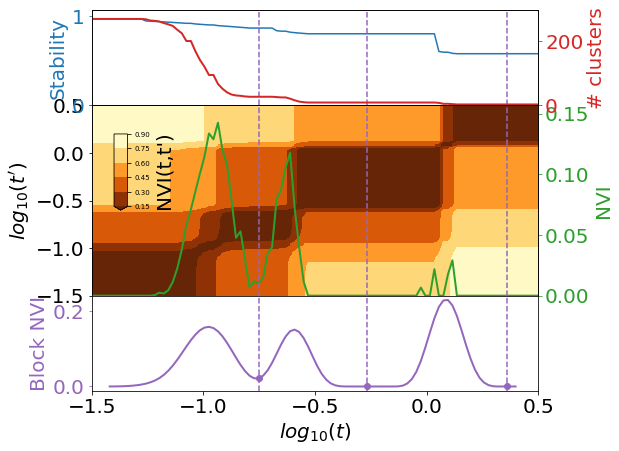

In [19]:
# select optimal scales
# identify_optimal_scales(all_results,kernel_size=30,window_size=20)
selected_scales = log_scales[all_results['selected_partitions']]
print(selected_scales)

figure(figsize=(8, 7))
plotting.plot_scan(all_results)
# plt.savefig(root_fig +'SBM_MS_Scan.pdf',bbox_inches='tight')

In [20]:
selected_paritions = all_results['selected_partitions']

n_communities = [len(np.unique(all_results['community_id'][i])) for i in range(len(scales))]

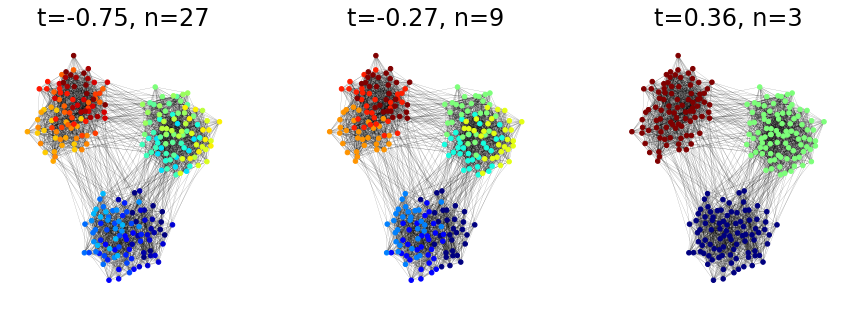

In [21]:
fig, axes = plt.subplots(1, len(selected_paritions), figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    scale = selected_paritions[i]
    
    nx.draw(G, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[scale],cmap = 'jet')
    ax.set(title=r't={}, n={}'.format(np.around(log_scales[scale],2), n_communities[scale]))

#plt.savefig(root_fig +'Partitions_ScaleCrit.pdf', dpi=fig.dpi,bbox_inches='tight')

In [22]:
from pygenstability.contrib.sankey import plot_sankey

In [23]:
all_results['selected_partitions']

[37, 61, 92]

In [24]:
# Hack to plot Sankey
all_results['selected_partitions'] = [35,40,51,62,80,104,150]
s = plot_sankey(all_results,optimal_scales=True,live=False)
# s.write_image(root_fig +"SBM_Sankey.pdf", format='pdf')

IndexError: list index out of range

# Persistent homology - gap based scale selection

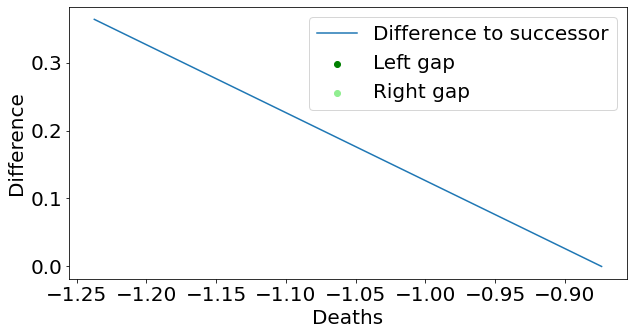

array([], dtype=float64)

In [ ]:
# Select optimal scales
msf.select_scales(threshold_abs=0.13,min_gap_width=0.13,with_plot=True)
msf.optimal_scales

<AxesSubplot:xlabel='Birth', ylabel='Death'>

<Figure size 504x504 with 0 Axes>

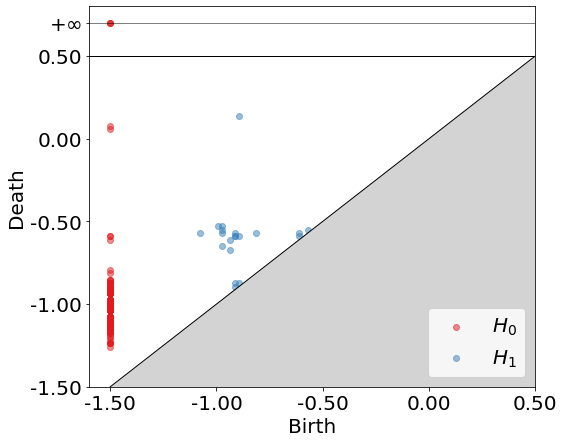

In [ ]:
# Plot persistence diagram with optimal scales

figure(figsize=(7, 7))
msf.plot_persistence_diagram()
# plt.savefig(root_fig +'SBM_PD.pdf',bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(1, len(msf.optimal_scales), figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    scale = msf.optimal_scales[i] 
    
    nx.draw(G, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[scale],cmap = 'jet')
    ax.set(title=r't={}, n={}'.format(np.around(log_scales[scale],2), n_communities[scale]))

#plt.savefig(root_fig +'Partitions_PH.pdf', dpi=fig.dpi,bbox_inches='tight')

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1080x360 with 0 Axes>

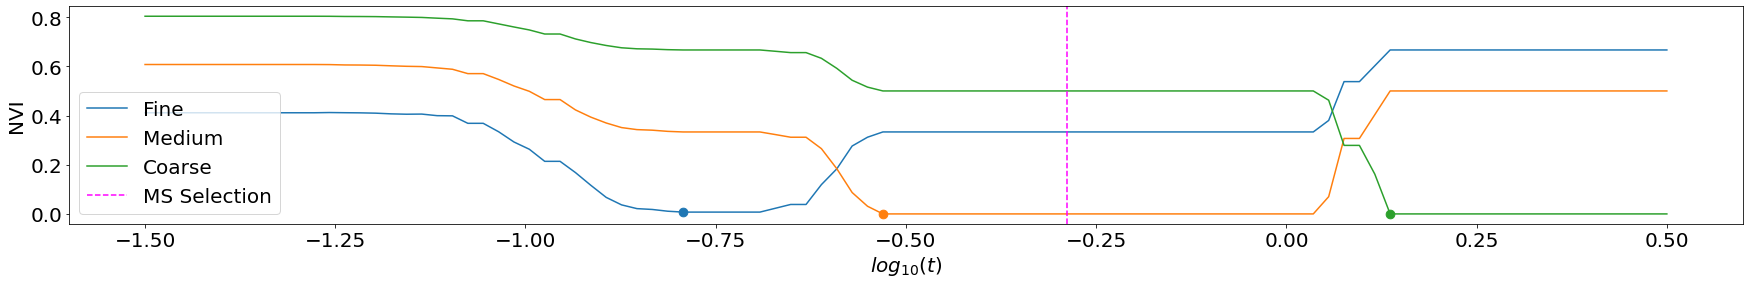

In [ ]:
# compare MS partitions to ground truth with NVI
NVI_scores_fine = np.array(
    [
        evaluate_NVI([0, i], [fine_scale_id] + all_results["community_id"])
        for i in range(1, n_scale + 1)
    ]
)
NVI_scores_middle = np.array(
    [
        evaluate_NVI([0, i], [middle_scale_id] + all_results["community_id"])
        for i in range(1, n_scale + 1)
    ]
)
NVI_scores_coarse = np.array(
    [
        evaluate_NVI([0, i], [coarse_scale_id] + all_results["community_id"])
        for i in range(1, n_scale + 1)
    ]
)



# # plot lower bound
fig, ax = plt.subplots(1, figsize=(30, 4))
# ax.axhline(0, c="k", ls="--")

# plot NVI scores
ax.plot(log_scales, NVI_scores_fine, label="Fine")
ax.plot(log_scales, NVI_scores_middle, label="Medium")
ax.plot(log_scales, NVI_scores_coarse, label="Coarse")

# plot minima of NVI scores
ax.scatter(
    log_scales[np.argmin(NVI_scores_fine)], NVI_scores_fine.min(), marker=".", s=300
)
ax.scatter(
    log_scales[np.argmin(NVI_scores_middle)],
    NVI_scores_middle.min(),
    marker=".",
    s=300,
)
ax.scatter(
    log_scales[np.argmin(NVI_scores_coarse)],
    NVI_scores_coarse.min(),
    marker=".",
    s=300,
)


for i in range(len(selected_scales)):
    if i == 0:
        ax.axvline(
            x=selected_scales[i],
            ls="--",
            color="Magenta",
            label="MS Selection",
        )
    else:
        ax.axvline(x=selected_scales[i], ls="--", color="Magenta")

for i in range(len(msf.optimal_scales)):
    if i == 0:
        ax.axvline(
            x=log_scales[msf.optimal_scales[i]],
            ls=":",
            color="Cyan",
            label="MCF Selection",
        )
    else:
        ax.axvline(x=log_scales[msf.optimal_scales[i]], ls=":", color="Cyan")

ax.set(xlabel=r"$log_{10}(t)$", ylabel="NVI")  # yticks = [0.2,0.4,0.6,0.8] )

ax.legend(loc=3)

# plt.savefig(root_fig +'SBM_NVI_Comparison.pdf', dpi=fig.dpi,bbox_inches='tight')

# Repeat with Julia

In [ ]:
msf.load_julia()

Loading Julia ...


┌ Warning: Error requiring `Blink` from `WebIO`
│   exception =
│    UndefVarError: AtomShell not defined
│    Stacktrace:
│      [1] getproperty(x::Module, f::Symbol)
│        @ Base ./Base.jl:31
│      [2] top-level scope
│        @ ~/.julia/packages/WebIO/rv35l/src/WebIO.jl:110
│      [3] eval
│        @ ./boot.jl:368 [inlined]
│      [4] eval
│        @ ~/.julia/packages/WebIO/rv35l/src/WebIO.jl:1 [inlined]
│      [5] (::WebIO.var"#76#88")()
│        @ WebIO ~/.julia/packages/Requires/Z8rfN/src/require.jl:101
│      [6] macro expansion
│        @ timing.jl:382 [inlined]
│      [7] err(f::Any, listener::Module, modname::String, file::String, line::Any)
│        @ Requires ~/.julia/packages/Requires/Z8rfN/src/require.jl:47
│      [8] (::WebIO.var"#75#87")()
│        @ WebIO ~/.julia/packages/Requires/Z8rfN/src/require.jl:100
│      [9] withpath(f::Any, path::String)
│        @ Requires ~/.julia/packages/Requires/Z8rfN/src/require.jl:37
│     [10] (::WebIO.var"#74#86")()
│        @ We

In [ ]:
msf.build_filtration(method="eirene", max_dim=1)

In [ ]:
msf.filtration_eirene

In [ ]:
msf.compute_persistence(method="eirene")

In [ ]:
# Plot persistence diagram
ax = msf.plot_persistence_diagram()

In [ ]:
msf.class_rep

# Persistent homology - density based scale selection

In [ ]:
from msfiltration.msf_properties import compute_combined_birth_count, compute_combined_death_count
from msfiltration.scale_selection import select_scales_density

In [ ]:
death_count = compute_combined_death_count(msf,[1,2])
birth_count = compute_combined_birth_count(msf,[0,1,2])

AttributeError: 'MS_MCF' object has no attribute 'n_scales'

In [ ]:
# compute death density
death_total = np.sum(death_count)
death_density = death_count / death_total

# compute birth density
birth_total = np.sum(birth_count)
birth_density = birth_count / birth_total

In [ ]:
import ruptures as rpt

In [ ]:
points = np.cumsum(death_density[:-1])

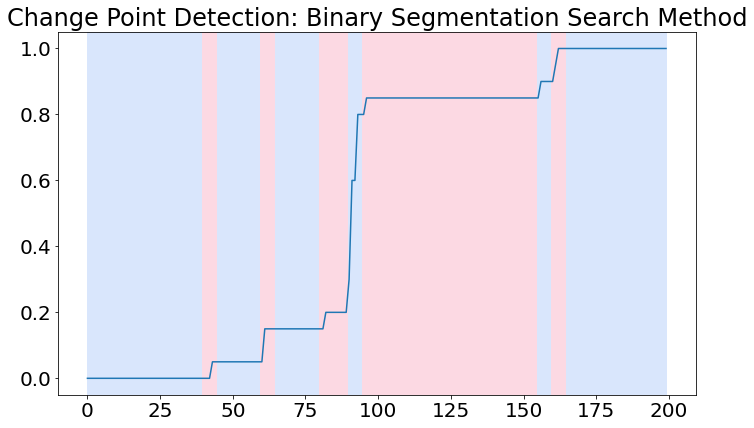

In [ ]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

In [ ]:
my_bkps

[40, 45, 60, 65, 80, 90, 95, 155, 160, 165, 200]

<AxesSubplot:xlabel='Birth', ylabel='Death'>

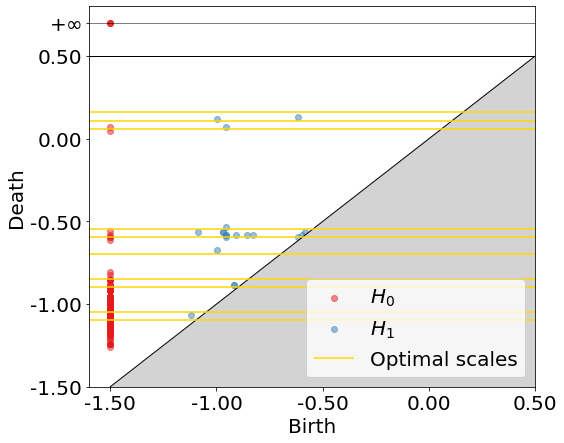

In [ ]:
msf.optimal_scales = my_bkps[:-1]
msf.plot_persistence_diagram()

In [ ]:
# # compare MS partitions to ground truth with NVI
# NVI_scores_fine = np.array(
#     [
#         _evaluate_NVI([0, i], [fine_scale_id] + all_results["community_id"])
#         for i in range(1, n_scale + 1)
#     ]
# )
# NVI_scores_middle = np.array(
#     [
#         _evaluate_NVI([0, i], [middle_scale_id] + all_results["community_id"])
#         for i in range(1, n_scale + 1)
#     ]
# )
# NVI_scores_coarse = np.array(
#     [
#         _evaluate_NVI([0, i], [coarse_scale_id] + all_results["community_id"])
#         for i in range(1, n_scale + 1)
#     ]
# )



# # plot lower bound
# fig, ax = plt.subplots(1, figsize=(15, 3.5))
# ax.axhline(0, c="k", ls="--")

# # plot NVI scores
# ax.plot(log_scales, NVI_scores_fine, label="Fine planted scale")
# ax.plot(log_scales, NVI_scores_middle, label="Middle planted scale")
# ax.plot(log_scales, NVI_scores_coarse, label="Coarse planted scale")

# # plot minima of NVI scores
# ax.scatter(
#     log_scales[np.argmin(NVI_scores_fine)], NVI_scores_fine.min(), marker=".", s=300
# )
# ax.scatter(
#     log_scales[np.argmin(NVI_scores_middle)],
#     NVI_scores_middle.min(),
#     marker=".",
#     s=300,
# )
# ax.scatter(
#     log_scales[np.argmin(NVI_scores_coarse)],
#     NVI_scores_coarse.min(),
#     marker=".",
#     s=300,
# )


# # for i in range(len(selected_scales)):
# #     if i == 0:
# #         ax.axvline(
# #             x=selected_scales[i],
# #             ls="--",
# #             color="purple",
# #             label="NVI Optimal Scales",
# #         )
# #     else:
# #         ax.axvline(x=selected_scales[i], ls="--", color="purple")

# for i in range(len(msf.optimal_scales)):
#     if i == 0:
#         ax.axvline(
#             x=log_scales[msf.optimal_scales[i]],
#             ls="--",
#             color="gold",
#             label="MSF Optimal Scales",
#         )
#     else:
#         ax.axvline(x=log_scales[msf.optimal_scales[i]], ls="--", color="gold")

# ax.set(xlabel=r"$log_{10}(t)$", ylabel="NVI")  # yticks = [0.2,0.4,0.6,0.8] )

# ax.legend(loc=3)

# #plt.savefig(root_fig +'NVI_Comparison.pdf', dpi=fig.dpi,bbox_inches='tight')

# Analyse hierarchy of partitions using $\beta_0$

In [ ]:
from msfiltration.msf_properties import compute_rank, compute_beta_0

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
rank = compute_rank(msf)
beta_0 = compute_beta_0(msf)

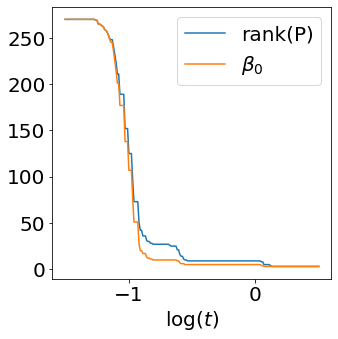

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(msf.log_scales,rank, label = 'rank(P)')
ax.plot(msf.log_scales,beta_0[:-1], label = r'$\beta_0$')
ax.set(xlabel=r'$\log(t)$')
ax.legend()
#plt.show()
plt.savefig(root_fig +'SBM_beta0.pdf', dpi=fig.dpi,bbox_inches='tight')

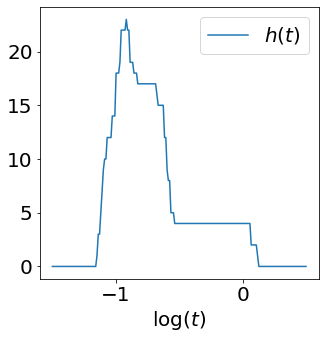

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(msf.log_scales,(rank-beta_0[:-1]), label = r'$h(t)$')
ax.set(xlabel=r'$\log(t)$')
ax.legend()
#plt.savefig(root_fig +'SBM_persistent_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')
plt.show()

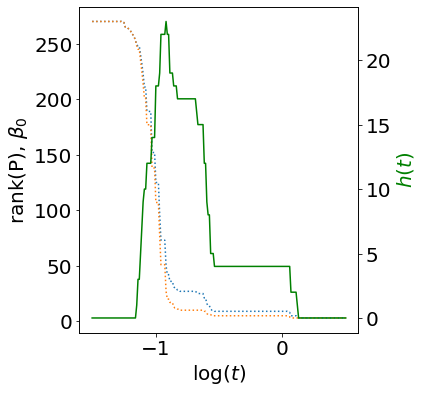

In [ ]:
fig, ax1 = plt.subplots(1, figsize=(5, 6))
ax1.plot(msf.log_scales,rank, label = 'rank(P)',ls=':')
ax1.plot(msf.log_scales,beta_0[:-1], label = r'$\beta_0$',ls=':')
ax1.set(xlabel=r'$\log(t)$',ylabel=r'rank(P), $\beta_0$')
handles1, labels = plt.gca().get_legend_handles_labels()
ax2 = ax1.twinx()
ax2.plot(msf.log_scales,(rank-beta_0[:-1]), label = r'$h(t)$',c='green')
ax2.set_ylabel(r'$h(t)$', color="green")
#ax2.tick_params("y", colors="green")
handles2, labels = plt.gca().get_legend_handles_labels()
# ax.legend()
# ax2.legend()
#plt.legend(handles=handles1+handles2)
#plt.show()
#plt.savefig(root_fig +'SBM_persistent_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')

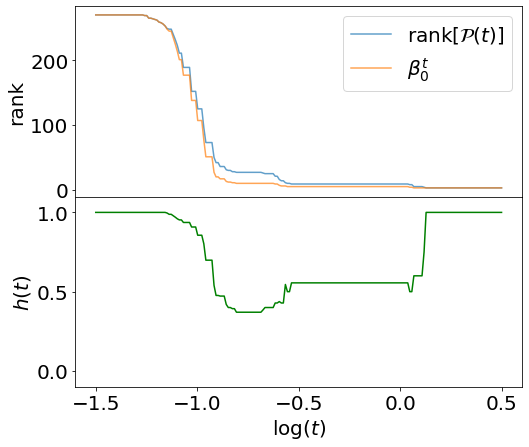

In [ ]:
fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(msf.log_scales,rank, label = r'rank$[\mathcal{P}(t)]$',alpha=0.7)#,ls=':')
ax1.plot(msf.log_scales,beta_0[:-1], label = r'$\beta_0^t$',alpha=0.7)#,ls=':')
ax1.set(xticks=[],ylabel=r'rank')

ax1.legend()

ax2.plot(msf.log_scales,beta_0[:-1]/rank, label = r'$h(t)$',c='green')
ax2.set_ylabel(r'$h(t)$')#, color="green")
ax2.set(xlabel=r'$\log(t)$',ylim=(-0.1,1.1))
#ax2.legend()
#plt.savefig(root_fig +'SBM_persistence_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')